[0.002]


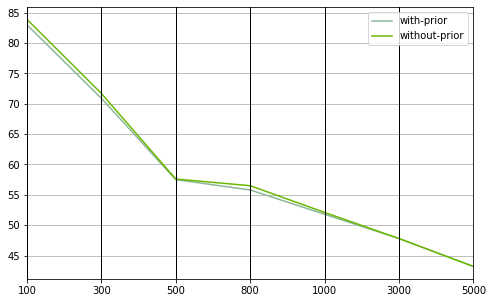

In [152]:
import pandas as pd
import numpy as np
#final_data=pd.read_csv('final_data_2.csv')
final_data=pd.read_csv('final_03071alarm.csv')
#final_data_1=pd.read_csv('final_03054hailfinder.csv')
#final_data_2=pd.read_csv('final_03053hailfinder.csv')

#final_data=final_data.append(final_data_1)
#final_data=final_data.append(final_data_2)

#final_data.to_csv('ffffinal_data_hailfinder.csv')
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

plot_data=pd.DataFrame()
plot_data['type']=['with-prior','without-prior']

weights=final_data['weight'].unique()
sample_sizes=final_data['sample_size'].unique()
weights.sort()
sample_sizes.sort()
print(weights)
for weight in weights:
    for sample_size in sample_sizes:
        plot_data[sample_size]=[np.mean(final_data.loc[(final_data['weight'] == weight) & (final_data['sample_size'] == sample_size), 'priori_dis']),
                               np.mean(final_data.loc[(final_data['weight'] == weight) & (final_data['sample_size'] == sample_size), 'origin_dis'])]

    plt.figure(figsize=(8,5))
    parallel_coordinates(plot_data,'type')

In [153]:
mean_data=pd.DataFrame()
tmp_data=pd.DataFrame()
weights=final_data['weight'].unique()
sample_sizes=final_data['sample_size'].unique()
print(weights,sample_sizes)
weights.sort()
sample_sizes.sort()
weight=0.002

for sample_size in sample_sizes:
    tmp_data['weight']=[weight]
    tmp_data['sample_size']=[sample_size]
    tmp_data['priori']=np.mean(final_data.loc[(final_data['weight'] == weight) & (final_data['sample_size'] == sample_size), 'priori_dis'])
    tmp_data['origin']=np.mean(final_data.loc[(final_data['weight'] == weight) & (final_data['sample_size'] == sample_size), 'origin_dis'])
    mean_data=mean_data.append(tmp_data)
mean_data

[0.002] [ 100  300  500  800 1000 3000 5000]


,weight,sample_size,priori,origin
0,0.002,100,83.0,83.9
0,0.002,300,70.9,71.7
0,0.002,500,57.5,57.6
0,0.002,800,55.8,56.5
0,0.002,1000,51.8,52.1
0,0.002,3000,47.8,47.8
0,0.002,5000,43.2,43.2


In [130]:
score_data=pd.DataFrame()
tmps_data=pd.DataFrame()
weights=final_data['weight'].unique()
sample_sizes=final_data['sample_size'].unique()

weights.sort()
sample_sizes.sort()
weight=0.02

for sample_size in sample_sizes:
    tmps_data['weight']=[weight]
    tmps_data['sample_size']=[sample_size]
    tmp_data_p=np.mean(final_data.loc[(final_data['weight'] == weight) & (final_data['sample_size'] == sample_size), 'best_priori_score'])
    tmp_data_o=np.mean(final_data.loc[(final_data['weight'] == weight) & (final_data['sample_size'] == sample_size), 'best_origin_score'])
    tmp_orign=np.mean(final_data.loc[(final_data['weight'] == weight) & (final_data['sample_size'] == sample_size), 'origin_score'])
    tmps_data['priori']=abs(tmp_data_p-tmp_orign)
    tmps_data['origin']=abs(tmp_data_o-tmp_orign)
    score_data=score_data.append(tmps_data)
score_data

,weight,sample_size,priori,origin
0,0.02,100,340.179453,338.881707
0,0.02,300,699.146834,695.278301
0,0.02,500,967.390470,962.553704
0,0.02,800,1286.285080,1282.365586
0,0.02,1000,1435.971385,1429.852187
0,0.02,3000,2353.293534,2327.024255
0,0.02,5000,2708.896701,2678.907076


[0.02]


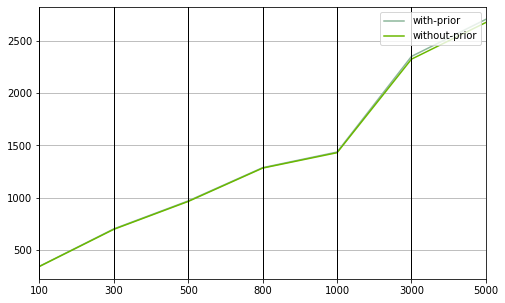

In [131]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

plot_data=pd.DataFrame()
plot_data['type']=['with-prior','without-prior']

weights=final_data['weight'].unique()
sample_sizes=final_data['sample_size'].unique()
weights.sort()
sample_sizes.sort()
print(weights)
for weight in weights:
    for sample_size in sample_sizes:
        plot_data[sample_size]=[score_data.loc[(score_data['sample_size']==sample_size),'priori'],
                               score_data.loc[(score_data['sample_size']==sample_size),'origin']]

    plt.figure(figsize=(8,5))
    parallel_coordinates(plot_data,'type')